In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings(action = "ignore")

In [2]:
df_train=pd.read_csv('train_insurance.csv')
df_train.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0,after 2015,0,0,37379,11000,0,0,0,0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1,before 2015,1,0,10238,9000,0,0,0,1,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1,before 2015,1,1,10238,12000,0,0,0,1,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1,before 2015,0,1,92099,6000,1,0,0,1,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1,after 2015,1,1,32122,15000,0,0,1,0,Sedan


In [3]:
df_test=pd.read_csv('test_insurance.csv')
df_test.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE
0,303713,16-25,male,10-19y,high school,middle class,0.424958,1,before 2015,1,0,10238,13000,0,0,0,Sports Car
1,141107,16-25,male,20-29y,high school,working class,0.503478,0,before 2015,1,1,10238,14000,0,0,0,SUV
2,447316,26-39,female,20-29y,high school,upper class,0.252246,1,before 2015,1,0,10238,10000,0,0,0,HatchBack
3,196066,16-25,female,20-29y,university,middle class,0.464749,1,before 2015,1,1,10238,7000,0,1,0,SUV
4,179947,16-25,male,20-29y,high school,working class,0.452968,1,after 2015,0,1,10238,13000,1,0,0,SUV


In [4]:
df_train.shape

(87285, 18)

In [5]:
df_test.shape

(17715, 17)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87285 entries, 0 to 87284
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87285 non-null  int64  
 1   AGE                  87285 non-null  object 
 2   GENDER               87285 non-null  object 
 3   DRIVING_EXPERIENCE   87285 non-null  object 
 4   EDUCATION            87285 non-null  object 
 5   INCOME               87285 non-null  object 
 6   CREDIT_SCORE         87285 non-null  float64
 7   VEHICLE_OWNERSHIP    87285 non-null  int64  
 8   VEHICLE_YEAR         87285 non-null  object 
 9   MARRIED              87285 non-null  int64  
 10  CHILDREN             87285 non-null  int64  
 11  POSTAL_CODE          87285 non-null  int64  
 12  ANNUAL_MILEAGE       87285 non-null  int64  
 13  SPEEDING_VIOLATIONS  87285 non-null  int64  
 14  DUIS                 87285 non-null  int64  
 15  PAST_ACCIDENTS       87285 non-null 

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17715 entries, 0 to 17714
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   17715 non-null  int64  
 1   AGE                  17715 non-null  object 
 2   GENDER               17715 non-null  object 
 3   DRIVING_EXPERIENCE   17715 non-null  object 
 4   EDUCATION            17715 non-null  object 
 5   INCOME               17715 non-null  object 
 6   CREDIT_SCORE         17715 non-null  float64
 7   VEHICLE_OWNERSHIP    17715 non-null  int64  
 8   VEHICLE_YEAR         17715 non-null  object 
 9   MARRIED              17715 non-null  int64  
 10  CHILDREN             17715 non-null  int64  
 11  POSTAL_CODE          17715 non-null  int64  
 12  ANNUAL_MILEAGE       17715 non-null  int64  
 13  SPEEDING_VIOLATIONS  17715 non-null  int64  
 14  DUIS                 17715 non-null  int64  
 15  PAST_ACCIDENTS       17715 non-null 

In [8]:
df_train.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,87285.000000,87285.000000,87285.000000,87285.000000,87285.000000,87285.000000,87285.000000,87285.000000,87285.000000,87285.000000,87285.000000
mean,394798.841554,0.602053,0.827760,0.584969,0.519746,18036.278192,11056.424357,0.679395,0.129633,0.546417,0.422959
std,279746.732730,0.137898,0.377591,0.492730,0.499613,16724.517018,2977.057974,1.388733,0.589598,1.397537,0.494032
min,101.000000,0.074401,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,156345.000000,0.514841,1.000000,0.000000,0.000000,10238.000000,9000.000000,0.000000,0.000000,0.000000,0.000000
50%,353756.000000,0.600938,1.000000,1.000000,1.000000,10238.000000,11000.000000,0.000000,0.000000,0.000000,0.000000
75%,598618.000000,0.703000,1.000000,1.000000,1.000000,22320.000000,13000.000000,1.000000,0.000000,0.000000,1.000000
max,999976.000000,0.954075,1.000000,1.000000,1.000000,92101.000000,21000.000000,20.000000,6.000000,15.000000,1.000000


In [9]:
df_train.describe(include=object)

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,TYPE_OF_VEHICLE
count,87285,87285,87285,87285,87285,87285,87285
unique,4,2,4,3,4,2,4
top,40-64,male,20-29y,high school,upper class,before 2015,Sports Car
freq,27967,54379,31171,38746,42685,47738,28723


In [10]:
df_train.duplicated().sum()

0

In [11]:
df_train.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
TYPE_OF_VEHICLE        0
dtype: int64

In [12]:
df_test.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,17715.000000,17715.000000,17715.000000,17715.000000,17715.000000,17715.000000,17715.000000,17715.000000,17715.000000,17715.000000
mean,395583.922382,0.602764,0.823483,0.580073,0.521253,18090.577533,11084.899802,0.657353,0.130229,0.563590
std,279441.633641,0.138770,0.381270,0.493561,0.499562,16632.970988,2949.045183,1.358387,0.590302,1.428455
min,101.000000,0.066880,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.000000,0.000000
25%,156427.500000,0.514939,1.000000,0.000000,0.000000,10238.000000,9000.000000,0.000000,0.000000,0.000000
50%,359194.000000,0.601685,1.000000,1.000000,1.000000,10238.000000,11000.000000,0.000000,0.000000,0.000000
75%,598524.500000,0.703931,1.000000,1.000000,1.000000,26318.000000,13000.000000,1.000000,0.000000,1.000000
max,999976.000000,0.951230,1.000000,1.000000,1.000000,92101.000000,21000.000000,15.000000,6.000000,15.000000


In [13]:
df_test.describe(include=object)

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,TYPE_OF_VEHICLE
count,17715,17715,17715,17715,17715,17715,17715
unique,4,2,4,3,4,2,4
top,40-64,male,20-29y,high school,upper class,before 2015,Sports Car
freq,5749,10938,6322,7844,8586,9773,5869


In [14]:
df_test.duplicated().sum()

0

In [15]:
df_test.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
TYPE_OF_VEHICLE        0
dtype: int64

In [16]:
df_train = df_train.drop(['ID','POSTAL_CODE'], axis=1)

In [17]:
df_test = df_test.drop(['ID','POSTAL_CODE'], axis=1)

In [18]:
df_train_num = df_train.select_dtypes(exclude=object)
df_train_num.drop('OUTCOME', axis=1, inplace=True)
df_train_cat = df_train.select_dtypes(include=object)

In [19]:
df_test_num = df_test.select_dtypes(exclude=object)
df_test_cat = df_test.select_dtypes(include=object)

In [20]:
df_train_cat = pd.get_dummies(df_train_cat, drop_first=True)
df_train_cat

,AGE_26-39,AGE_40-64,AGE_65+,GENDER_male,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_none,EDUCATION_university,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_before 2015,TYPE_OF_VEHICLE_SUV,TYPE_OF_VEHICLE_Sedan,TYPE_OF_VEHICLE_Sports Car
0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
2,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0
4,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87280,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0
87281,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0
87282,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
87283,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1


In [21]:
df_test_cat = pd.get_dummies(df_test_cat, drop_first=True)
df_test_cat

,AGE_26-39,AGE_40-64,AGE_65+,GENDER_male,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_none,EDUCATION_university,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_before 2015,TYPE_OF_VEHICLE_SUV,TYPE_OF_VEHICLE_Sedan,TYPE_OF_VEHICLE_Sports Car
0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
1,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0
2,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17710,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0
17711,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
17712,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0
17713,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0


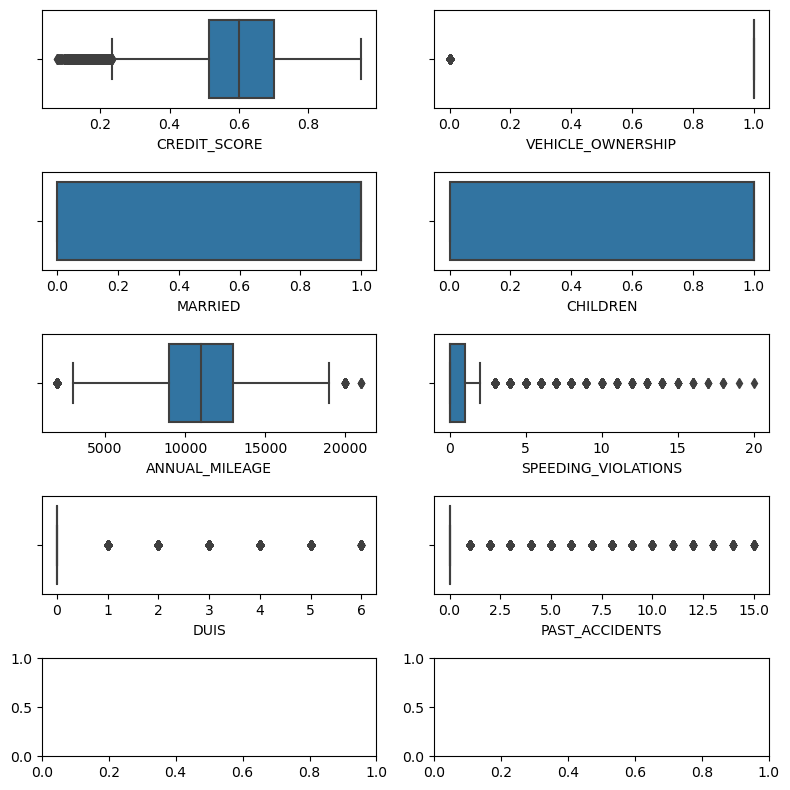

In [22]:
fig, ax = plt.subplots(5, 2, figsize=(8, 8))

for variable, subplot in zip(df_train_num, ax.flatten()):
    boxplt = sns.boxplot(x=df_train_num[variable], ax=subplot)
    boxplt.set_xlabel(variable, fontsize = 10)
    
plt.tight_layout()   
plt.show() 

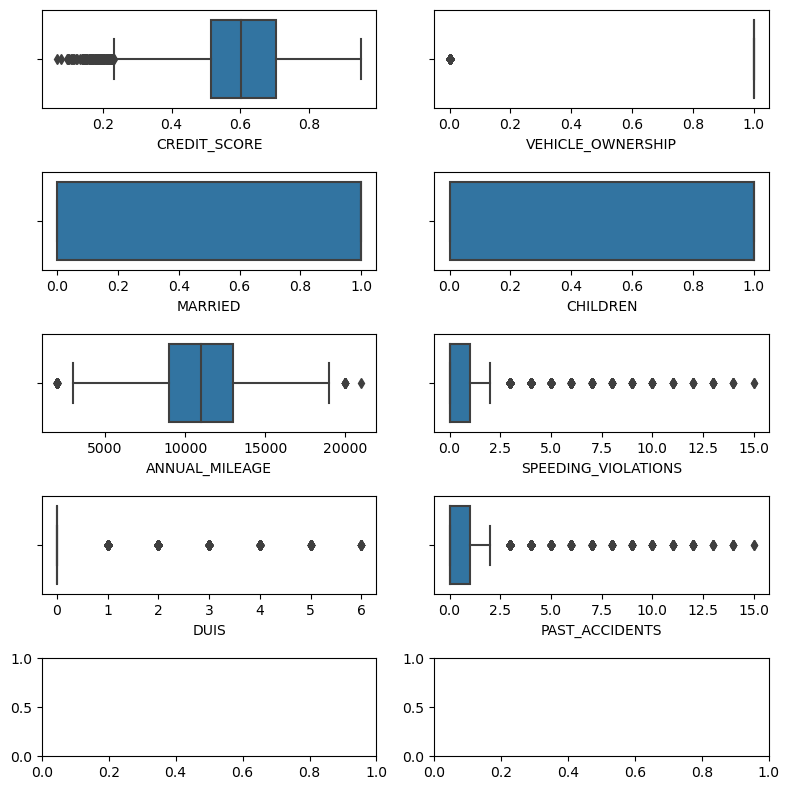

In [23]:
fig, ax = plt.subplots(5, 2, figsize=(8, 8))

for variable, subplot in zip(df_test_num, ax.flatten()):
    boxplt = sns.boxplot(x=df_test_num[variable], ax=subplot)
    boxplt.set_xlabel(variable, fontsize = 10)
    
plt.tight_layout()   
plt.show() 

In [24]:
X_train=pd.concat([df_train_num, df_train_cat], axis=1)
X = X_train.copy()
scale = StandardScaler()
X_train = pd.DataFrame(scale.fit_transform(X_train), columns=X_train.columns)
y_train = df_train['OUTCOME']

In [25]:
X_test=pd.concat([df_test_num, df_test_cat], axis=1)
x = X_test.copy()
scale = StandardScaler()
X_test = pd.DataFrame(scale.fit_transform(X_test), columns=X_test.columns)

In [26]:
LR = LogisticRegression(random_state=100)
LR.fit(X_train, y_train)

LogisticRegression(random_state=100)

In [27]:
from sklearn.metrics import classification_report

In [28]:
y_train_pred = LR.predict(X_train)
train_acc_table=classification_report(y_train, y_train_pred)
print(train_acc_table)

              precision    recall  f1-score   support

           0       0.58      1.00      0.73     50367
           1       0.00      0.00      0.00     36918

    accuracy                           0.58     87285
   macro avg       0.29      0.50      0.37     87285
weighted avg       0.33      0.58      0.42     87285



In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
def performance(model,x,y):
    y_pred = model.predict(x)
    print('Confusion Matrix')
    cm = confusion_matrix(y,y_pred)
    print(cm)
    print("Classification Report")
    print(classification_report(y,y_pred))

In [31]:
performance(LR,X_train,y_train)

Confusion Matrix
[[50367     0]
 [36918     0]]
Classification Report
              precision    recall  f1-score   support

           0       0.58      1.00      0.73     50367
           1       0.00      0.00      0.00     36918

    accuracy                           0.58     87285
   macro avg       0.29      0.50      0.37     87285
weighted avg       0.33      0.58      0.42     87285



In [32]:
X_c=sm.add_constant(X_train)
logit = sm.Logit(y_train, X_c).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.680942
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                OUTCOME   No. Observations:                87285
Model:                          Logit   Df Residuals:                    87260
Method:                           MLE   Df Model:                           24
Date:                Fri, 12 Jan 2024   Pseudo R-squ.:               0.0004222
Time:                        18:10:59   Log-Likelihood:                -59436.
converged:                       True   LL-Null:                       -59461.
Covariance Type:            nonrobust   LLR p-value:                  0.001332
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.3108      0.007    -45.352      0.000      -0.324      -0.297
CREDIT_SCORE                  -0.0083      0.007     -1.203      0.229      -0.022       0.005
VEHICLE_OWNERSHIP             -0.0031      0.007     -0.457      0.648      -0.017       0.010
MARRIED                       -0.0064      0.007     -0.927      0.354      -0.020       0.007
CHILDREN                       0.0030      0.007      0.433      0.665      -0.010       0.016
ANNUAL_MILEAGE                -0.0069      0.007     -1.002      0.316      -0.020       0.007
SPEEDING_VIOLATIONS            0.0010      0.007      0.152      0.879      -0.012       0.014
DUIS                           0.0019      0.007      0.276      0.782      -0.012       0.015
PAST_ACCIDENTS                -0.0040      0.007     -0.589      0.556      -0.017       0.009
AGE_26-39                      0.0094      0.009      1.055      0.291      -0.008       0.027
AGE_40-64                      0.0118      0.010      1.242      0.214      -0.007       0.030
AGE_65+                        0.0082      0.010      0.859      0.390      -0.010       0.027
GENDER_male                   -0.0216      0.007     -3.154      0.002      -0.035      -0.008
DRIVING_EXPERIENCE_10-19y     -0.0117      0.008     -1.468      0.142      -0.027       0.004
DRIVING_EXPERIENCE_20-29y      0.0237      0.008      2.950      0.003       0.008       0.039
DRIVING_EXPERIENCE_30y+        0.0115      0.007      1.561      0.119      -0.003       0.026
EDUCATION_none                 0.0020      0.007      0.271      0.786      -0.013       0.017
EDUCATION_university          -0.0032      0.007     -0.432      0.666      -0.018       0.011
INCOME_poverty                 0.0074      0.009      0.828      0.408      -0.010       0.025
INCOME_upper class             0.0052      0.010      0.499      0.618      -0.015       0.026
INCOME_working class          -0.0013      0.010     -0.135      0.892      -0.021       0.018
VEHICLE_YEAR_before 2015       0.0010      0.007      0.148      0.883      -0.012       0.014
TYPE_OF_VEHICLE_SUV           -0.0203      0.008     -2.481      0.013      -0.036      -0.004
TYPE_OF_VEHICLE_Sedan         -0.0131      0.009     -1.536      0.124      -0.030       0.004
TYPE_OF_VEHICLE_Sports Car     0.0039      0.009      0.447      0.655      -0.013       0.021
==============================================================================================
"""

In [33]:
y_pred_prob=logit.predict(X_c)
y_pred=[1 if i>0.5 else 0 for i in y_pred_prob]

In [34]:
test_acc_table=classification_report(y_train, y_pred)
print(test_acc_table)

              precision    recall  f1-score   support

           0       0.58      1.00      0.73     50367
           1       0.00      0.00      0.00     36918

    accuracy                           0.58     87285
   macro avg       0.29      0.50      0.37     87285
weighted avg       0.33      0.58      0.42     87285



In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'criterion':['entropy','gini'],
                    'max_depth':range(2,9),
                    'max_features':['sqrt','log2'],
                    'min_samples_split':range(2,10),
                    'min_samples_leaf':range(1,10),
                    'max_leaf_nodes':range(2,10)}]

decision_tree_classification = DecisionTreeClassifier(random_state=10)

tree_grid = GridSearchCV(estimator=decision_tree_classification, param_grid=tuned_parameters, cv=5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train, y_train)

print('Best parameters for decision tree classifier:', tree_grid_model.best_params_,'\n')

Best parameters for decision tree classifier: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [37]:
dt_model = DecisionTreeClassifier(**tree_grid_model.best_params_)
dt_model = dt_model.fit(X_train, y_train)

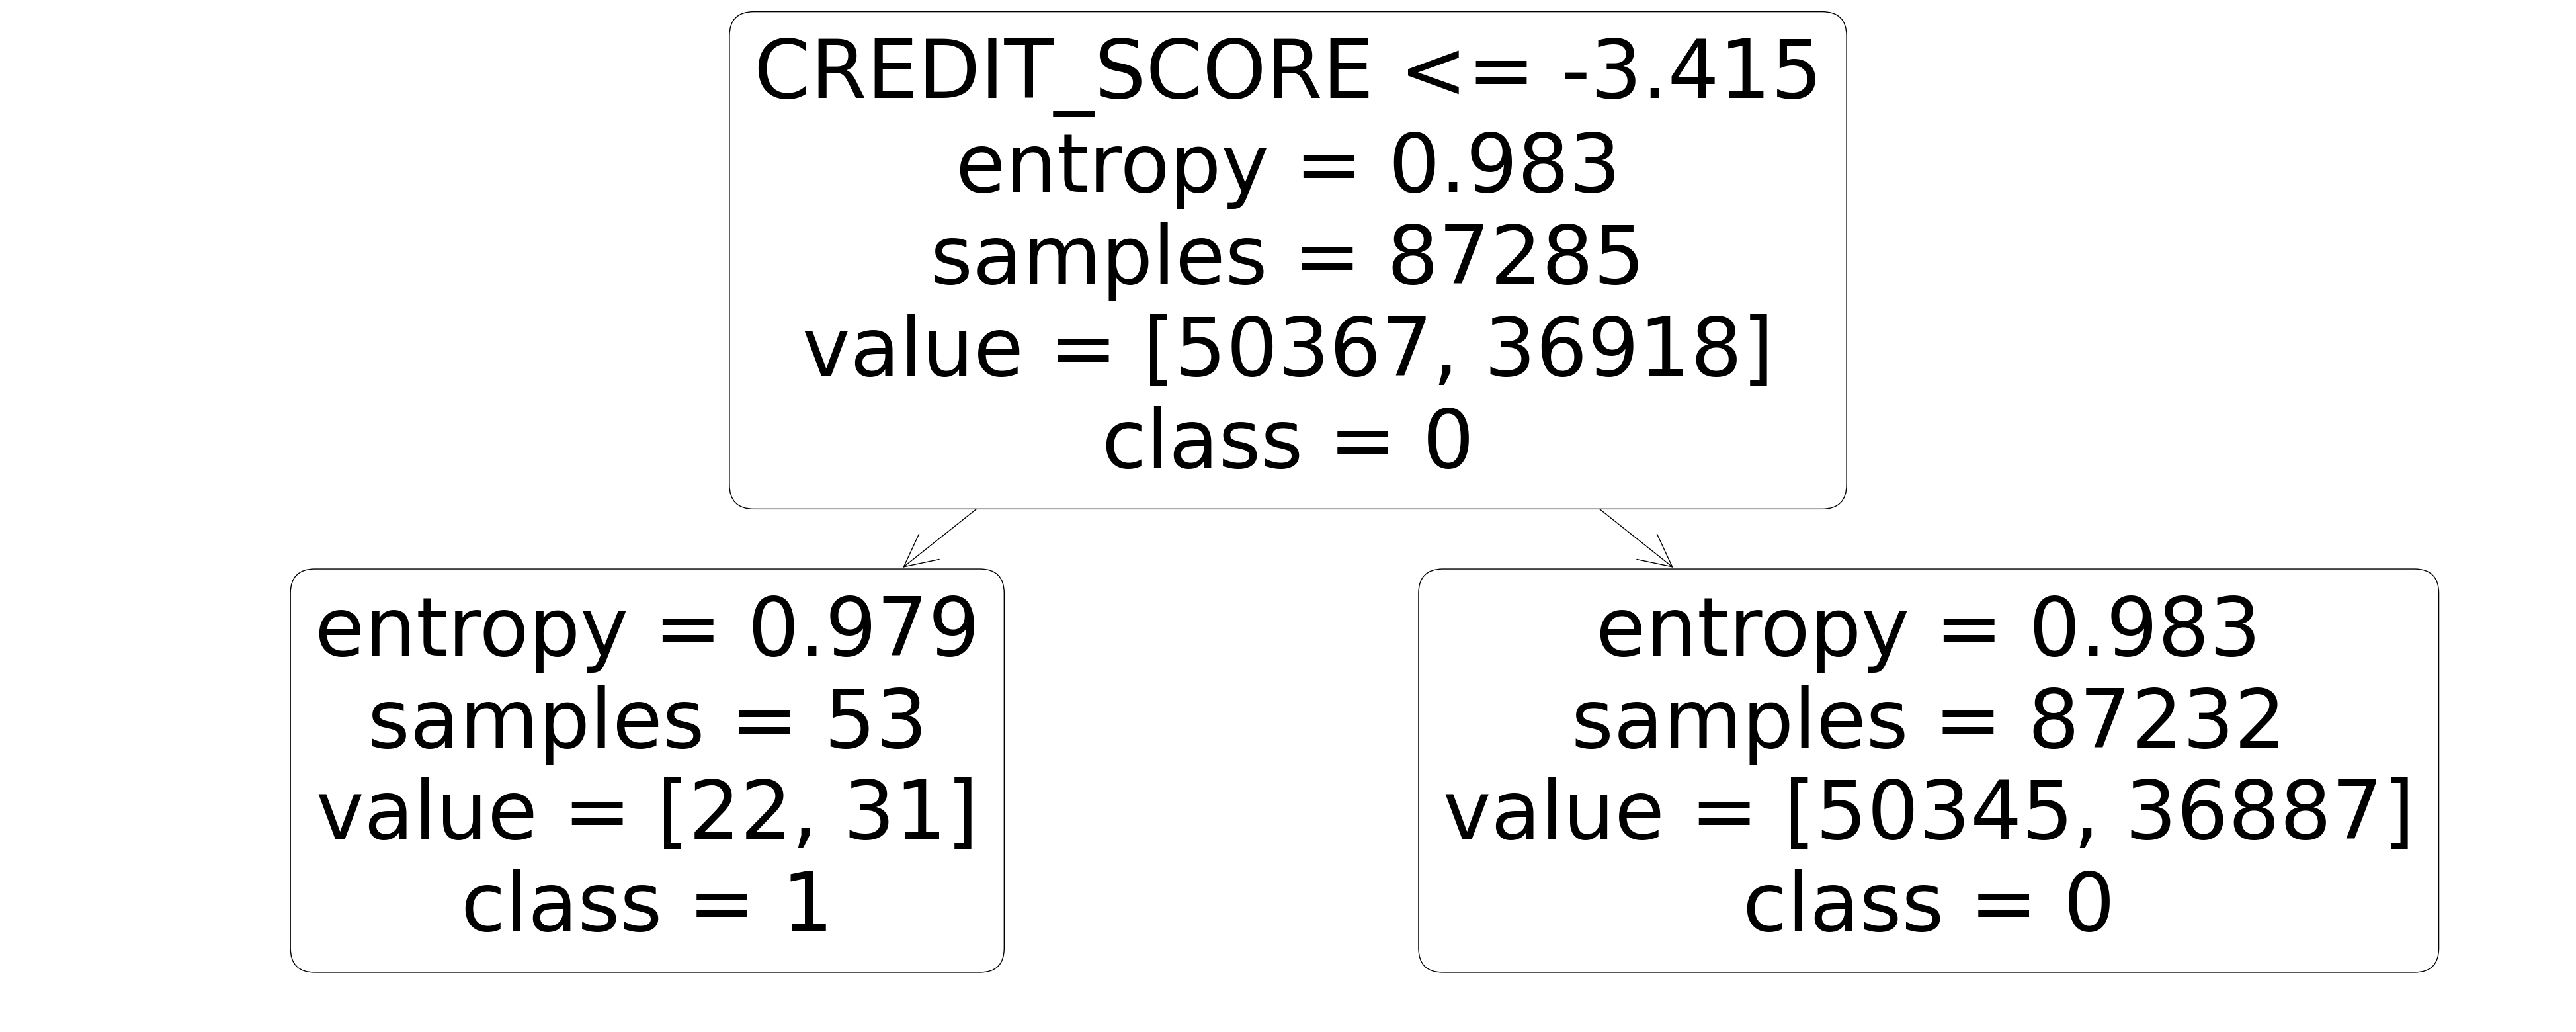

In [38]:
from sklearn import tree
plt.figure(figsize=(50,20))
tree.plot_tree(dt_model, feature_names=list(X_train.columns), rounded=True, class_names=['0','1'])
plt.show()

In [39]:
performance(dt_model,X_train,y_train)

Confusion Matrix
[[50345    22]
 [36887    31]]
Classification Report
              precision    recall  f1-score   support

           0       0.58      1.00      0.73     50367
           1       0.58      0.00      0.00     36918

    accuracy                           0.58     87285
   macro avg       0.58      0.50      0.37     87285
weighted avg       0.58      0.58      0.42     87285



# Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf_classification = RandomForestClassifier(n_estimators=10,random_state=10)

rf_model = rf_classification.fit(X_train,y_train)

In [66]:
pd.Series(rf_classification.predict(X_test)).value_counts()

0    13254
1     4461
dtype: int64

In [76]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'criterion':['entropy','gini'],
                     'n_estimators' : [10,30,50,70,90],
                    'max_depth': [10,15,20],
                    'max_features':['sqrt','log2'],
                    'min_samples_split': [2,5,8,11]}]

random_forest_classification = RandomForestClassifier(random_state=10)

In [77]:
%%time
rf_grid = GridSearchCV(estimator=random_forest_classification, param_grid=tuned_parameters, cv=5)

# fit the model on X_train and y_train using fit()
rf_grid_model = rf_grid.fit(X_train, y_train)

print('Best parameters for random forest classifier:', rf_grid_model.best_params_,'\n')

Best parameters for random forest classifier: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50} 

CPU times: total: 30.5 s
Wall time: 42.3 s


In [78]:
rf_model = RandomForestClassifier(**rf_grid_model.best_params_,random_state=10)
rf_model = rf_model.fit(X_train, y_train)

In [79]:
performance(rf_model,X_train,y_train)

Confusion Matrix
[[50367     0]
 [36526   392]]
Classification Report
              precision    recall  f1-score   support

           0       0.58      1.00      0.73     50367
           1       1.00      0.01      0.02     36918

    accuracy                           0.58     87285
   macro avg       0.79      0.51      0.38     87285
weighted avg       0.76      0.58      0.43     87285



# Ada boost

In [73]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=20,random_state= 10)

ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=20, random_state=10)

In [74]:
pd.Series(ada_model.predict(X_test)).value_counts()

0    17702
1       13
dtype: int64

In [75]:
train_pred = ada_model.predict(X_train)

print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73     50367
           1       0.62      0.00      0.00     36918

    accuracy                           0.58     87285
   macro avg       0.60      0.50      0.37     87285
weighted avg       0.60      0.58      0.42     87285



# Gradient Boosting Classifier

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

gboost_model = GradientBoostingClassifier(n_estimators=30,max_depth=10,learning_rate=0.01,random_state=10)

In [82]:
gboost_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=10, n_estimators=30,
                           random_state=10)

In [83]:
pd.Series(gboost_model.predict(X_test)).value_counts()

0    17668
1       47
dtype: int64

In [84]:
performance(gboost_model,X_train,y_train)

Confusion Matrix
[[50367     0]
 [36721   197]]
Classification Report
              precision    recall  f1-score   support

           0       0.58      1.00      0.73     50367
           1       1.00      0.01      0.01     36918

    accuracy                           0.58     87285
   macro avg       0.79      0.50      0.37     87285
weighted avg       0.76      0.58      0.43     87285



In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'learning_rate':[0.1,0.2,0.3,0.4],
                     'n_estimators' : [50],
                    'max_depth': range(3,10)}]

gclassifier = GradientBoostingClassifier(random_state=10)

gb_grid = GridSearchCV(estimator=gclassifier, param_grid=tuned_parameters, cv=3, scoring='roc_auc')

# fit the model on X_train and y_train using fit()
gb_grid_model = gb_grid.fit(X_train, y_train)

print('Best parameters for random forest classifier:', gb_grid_model.best_params_,'\n')

In [ ]:
gclassifier=GradientBoostingClassifier(**gb_grid.best_params_,random_state=10)
model=gclassifier.fit(X_train,y_train)

In [ ]:
pd.Series(gboost_model.predict(X_test)).value_counts()

In [68]:
y_pred = rf_model.predict(X_test)

In [69]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
a=pd.read_csv('test_insurance.csv')
b=a['ID']
c=pd.concat([b,pd.Series(y_pred)], axis=1)

In [70]:
# Save the DataFrame to a CSV file
c.to_csv('RF_withot_GS.csv', index=False)